In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sinc_model = tf.lite.Interpreter('sinc_model.tflite')
quantized_sinc_model = tf.lite.Interpreter('quantized_sinc_model.tflite')

In [3]:
sinc_model.allocate_tensors()

In [9]:
sinc_model.get_input_details()

[{'name': 'dense_input',
  'index': 0,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [10]:
sinc_model.get_output_details()

[{'name': 'Identity',
  'index': 6,
  'shape': array([1, 1], dtype=int32),
  'shape_signature': array([-1,  1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [4]:
sinc_model_input_index = sinc_model.get_input_details()[0]['index']

In [7]:
sinc_model_output_index = sinc_model.get_output_details()[0]['index']

In [11]:
sinc_model_predictions = []

In [12]:
xarray = np.linspace(-10, 10, 101)

In [13]:
for x_value in xarray:
    x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
    sinc_model.set_tensor(sinc_model_input_index, x_value_tensor)
    sinc_model.invoke()
    prediction = sinc_model.get_tensor(sinc_model_output_index)[0]
    sinc_model_predictions.append(prediction)

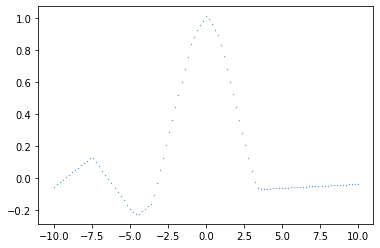

In [14]:
plt.scatter(xarray, sinc_model_predictions, s=0.1)